# 🏆 Best Performing CNN Model for our project
Welcome to the highlight of this project our best, most powerful model!  
After trying different architectures, tweaking layers, and battling overfitting, this model stood out as the **champion** 🥇

---

## 📥 1. Load Data from Kaggle

In [ ]:
!kaggle datasets download -d gsnikkitha/real-time-hand-gesture-recognition
!unzip real-time-hand-gesture-recognition.zip -d real_time_gesture

Streaming output truncated to the last 5000 lines.
  inflating: real_time_gesture/Dataset/call_me/3992.jpg  
  inflating: real_time_gesture/Dataset/call_me/3999.jpg  
  inflating: real_time_gesture/Dataset/call_me/4006.jpg  
  inflating: real_time_gesture/Dataset/call_me/4012.jpg  
  inflating: real_time_gesture/Dataset/call_me/4020.jpg  
  inflating: real_time_gesture/Dataset/call_me/4028.jpg  
  inflating: real_time_gesture/Dataset/call_me/4035.jpg  
  inflating: real_time_gesture/Dataset/call_me/4043.jpg  
  inflating: real_time_gesture/Dataset/call_me/4049.jpg  
  inflating: real_time_gesture/Dataset/call_me/4057.jpg  
  inflating: real_time_gesture/Dataset/call_me/4066.jpg  
  inflating: real_time_gesture/Dataset/call_me/411.jpg  
  inflating: real_time_gesture/Dataset/call_me/425.jpg  
  inflating: real_time_gesture/Dataset/call_me/4327.jpg  
  inflating: real_time_gesture/Dataset/call_me/4335.jpg  
  inflating: real_time_gesture/Dataset/call_me/4341.jpg  
  inflating: real_time_

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Classifier: ['paper', 'scissor', 'spock', 'okay', 'call_me', 'fingers_crossed', 'index_up', 'rock_on', 'rock', 'thumbs_up']
image number for each:
paper: 539 image
scissor: 527 image
spock: 526 image
okay: 540 image
call_me: 527 image
fingers_crossed: 504 image
index_up: 504 image
rock_on: 531 image
rock: 508 image
thumbs_up: 537 image
Tatal number og imegs: 5243


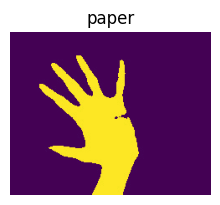

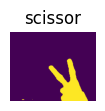

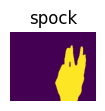

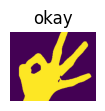

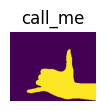

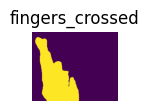

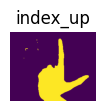

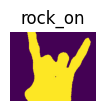

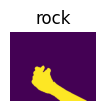

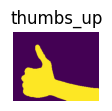

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = '/content/real_time_gesture/Dataset'


gestures = [g for g in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, g))]
print("Classifier:", gestures)


total_images = 0
print("image number for each:")
for gesture in gestures:
    gesture_path = os.path.join(data_path, gesture)
    num_images = len([f for f in os.listdir(gesture_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    print(f"{gesture}: {num_images} image")
    total_images += num_images

print(f"Tatal number og imegs: {total_images}")

plt.figure(figsize=(15, 10))
for i, gesture in enumerate(gestures):
    gesture_path = os.path.join(data_path, gesture)
    if os.path.isdir(gesture_path):
       image_file = os.listdir(gesture_path)[0]
       image_path = os.path.join(gesture_path, image_file)
       img = mpimg.imread(image_path)
       plt.subplot(4, 5, i+1)
       plt.imshow(img)
       plt.title(gesture)
       plt.axis('off')
    plt.show()

## 🧹 2. Data Preprocessing

- Converted all images to grayscale (1 channel)
- Resized to 64x64 pixels
- Augmented training data to improve generalization
- Split into: training and validation sets

Why? 🤔  
To **normalize** inputs and give the model a richer dataset to learn from especially useful for deep architectures.


In [ ]:
import tensorflow as tf

def load_and_prcess_data(DATA_PATH, IMG_SIZE=64, BATCH_SIZE=32, SEED=123, augment=True):
    AUTOTUNE = tf.data.AUTOTUNE
    normalization_layer = tf.keras.layers.Rescaling(1./255)

    train_ds = tf.keras.utils.image_dataset_from_directory(
        DATA_PATH,
        validation_split=0.2,
        subset="training",
        seed=SEED,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        DATA_PATH,
        validation_split=0.2,
        subset="validation",
        seed=SEED,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE
    )

    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.05),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomTranslation(0.1, 0.1)
    ])

    def to_grayscale(image, label):
        image = tf.image.rgb_to_grayscale(image)
        return image, label

    def preprocess(ds, is_train=False):
        ds = ds.map(to_grayscale, num_parallel_calls=AUTOTUNE)
        ds = ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
        if is_train and augment:
            ds = ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=AUTOTUNE)
        ds = ds.cache()
        ds = ds.prefetch(buffer_size=AUTOTUNE)
        return ds

    train_ds = preprocess(train_ds, is_train=True)
    val_ds = preprocess(val_ds, is_train=False)

    return train_ds, val_ds


In [ ]:
data_path = '/content/real_time_gesture/Dataset'

In [ ]:
train_ds, val_ds = load_and_prcess_data(DATA_PATH=data_path, IMG_SIZE=64, BATCH_SIZE=32, SEED=123, augment=True)

Found 5243 files belonging to 10 classes.
Using 4195 files for training.
Found 5243 files belonging to 10 classes.
Using 1048 files for validation.


## 🔍 3. Quick Data Peek

In [ ]:
#chack the shapes:
for images, labels in train_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

Images shape: (32, 64, 64, 1)
Labels shape: (32,)


In [ ]:
#chack the numbers of images:
train_count = 0
for _ in train_ds:
    train_count += 1

val_count = 0
for _ in val_ds:
    val_count += 1

print(f"Train batches: {train_count}, Total images: {train_count * 32}")
print(f"validation{val_count}, Total images: {val_count *32}")

Train batches: 132, Total images: 4224
validation33, Total images: 1056


In [ ]:
#chack the shape
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels[:5])

(32, 64, 64, 1)
tf.Tensor([3 9 0 9 8], shape=(5,), dtype=int32)


In [ ]:
temp_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

class_names = temp_ds.class_names
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Class names:", class_names)

Found 5243 files belonging to 10 classes.
Using 4195 files for training.
Number of classes: 10
Class names: ['call_me', 'fingers_crossed', 'index_up', 'okay', 'paper', 'rock', 'rock_on', 'scissor', 'spock', 'thumbs_up']


Let’s take a peek at a few augmented images.
This helps to visually confirm that augmentation works and that the model will see diverse versions of the same gesture.

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1,0.1)
])

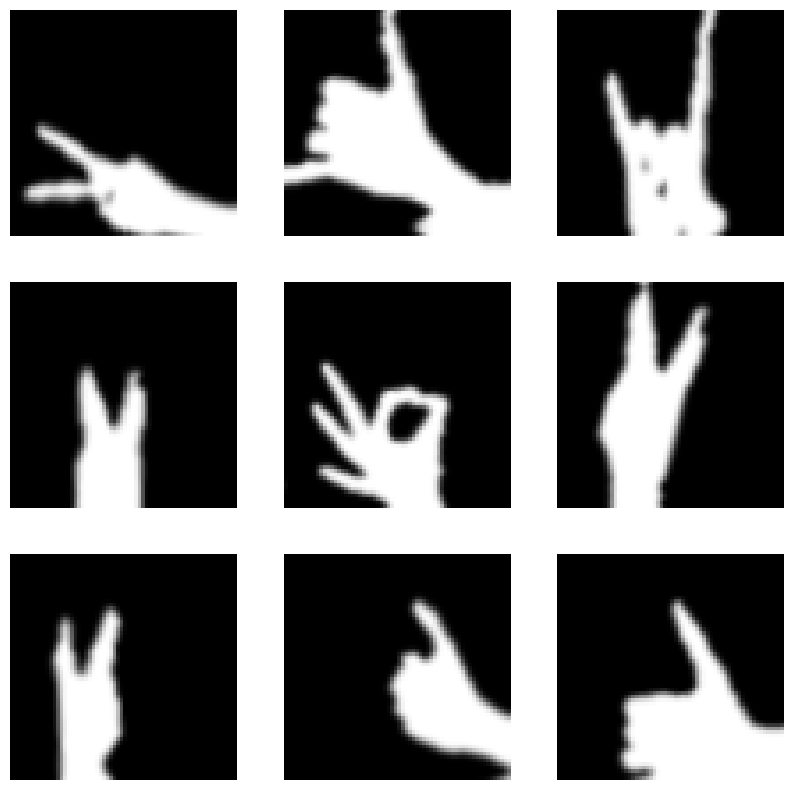

In [ ]:
import matplotlib.pyplot as plt
for images, labels in train_ds.take(1):
    augmented_images = data_augmentation(images)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().squeeze(), cmap='gray')
        plt.axis("off")

## 🧠 4. CNN Architecture (a serious one!)

Now we build a **deep convolutional neural network** with:

- Three convolutional blocks (Conv + BatchNorm + Dropout)
- Two dense layers for strong feature integration
- Regularization techniques like Dropout to reduce overfitting
- Batch Normalization to stabilize and speed up training

The model is deeper, more robust, and more expressive than our baselines.


In [ ]:
import tensorflow as tf
IMG_SIZE = 64
from tensorflow.keras.callbacks import EarlyStopping

model4 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

## ⚙️ 5. Compile the Model

We used the **Adam** optimizer for adaptive learning and **EarlyStopping** to save the best weights if validation accuracy plateaus.


In [ ]:
model4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## ⏱️ 6. Training the Model

Let the learning begin! 🔥  
We train for 50 epochs (max) but stop early if validation accuracy doesn't improve.


In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True)
history4 = model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
     verbose = 1,
    callbacks = [es]
)

Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 104s 751ms/step - accuracy: 0.2947 - loss: 2.4652 - val_accuracy: 0.0811 - val_loss: 12.2643
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 97s 733ms/step - accuracy: 0.5583 - loss: 1.3509 - val_accuracy: 0.0811 - val_loss: 11.9961
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 95s 718ms/step - accuracy: 0.6662 - loss: 0.9447 - val_accuracy: 0.1641 - val_loss: 10.8352
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 95s 718ms/step - accuracy: 0.7624 - loss: 0.6908 - val_accuracy: 0.2433 - val_loss: 5.1603
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 97s 736ms/step - accuracy: 0.8195 - loss: 0.5185 - val_accuracy: 0.7032 - val_loss: 0.9817
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 98s 741ms/step - accuracy: 0.8510 - loss: 0.4409 - val_accuracy: 0.7777 - val_loss: 0.7155
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 141s 734ms/step - accuracy: 0.6678 - loss: 1.0700 - val_accuracy: 0.8903 - val_loss: 0.3611
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 97s 737ms/step - accuracy: 0.8151 - lo

## 📊 7. Accuracy Over Time

Time to **visualize how well the model learned** across epochs.


## ✅ 8. Conclusion

This model was the best performer. Hands down ✋🏽  
It combined:

- Deep architecture with rich feature extraction
- Smart regularization (Dropout + BatchNorm)
- High validation and test accuracy

With great depth comes great performance 💪  
This CNN didn’t just learn it **understood** the gestures.

🏁 On to the next challenge!

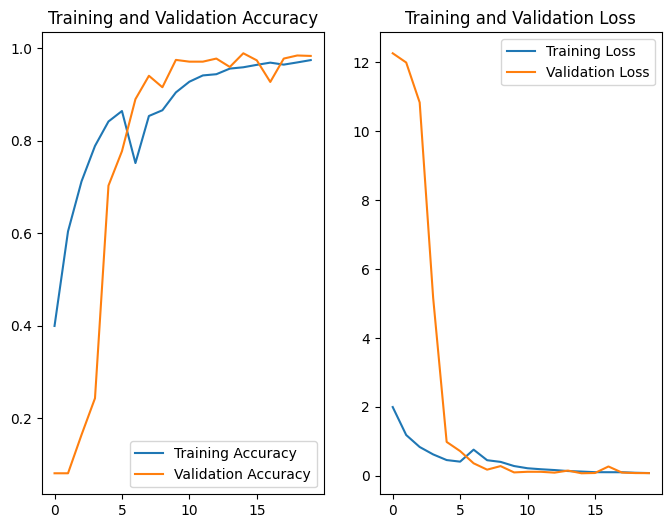

In [ ]:
import matplotlib.pyplot as plt

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()